In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

## Import data

In [3]:
#import KCDC dataset
patient_kcdc = pd.read_csv('coronavirusdataset/patient.csv')
route_kcdc = pd.read_csv('coronavirusdataset/route.csv')
time_kcdc = pd.read_csv('coronavirusdataset/time.csv')

In [4]:
patient_kcdc.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [16]:
print(patient_kcdc['infection_reason'].unique())
print(patient_kcdc['state'].unique())
patient_kcdc['age'] =  2020 - patient_kcdc['birth_year']

['visit to Wuhan' 'contact with patient' 'contact with patient in Japan'
 'residence in Wuhan' 'visit to Thailand'
 'contact with patient in Singapore' 'visit to China' nan 'visit to Daegu'
 'pilgrimage to Israel' 'visit to Vietnam' ' visit to China'
 'visit to Cheongdo Daenam Hospital' 'visit to Japan' 'visit to Italy']
['released' 'isolated' 'deceased']


In [6]:
route_kcdc.head()

,id,date,province,city,visit,latitude,longitude
0,1,2020-01-19,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,2020-01-20,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,2020-01-23,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,2020-01-20,Incheon,Jung-gu,airport,37.460459,126.440680


In [7]:
time_kcdc.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


## Exploratory Data Analysis

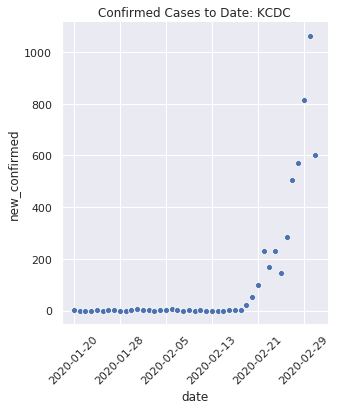

In [59]:
sns.relplot(x = 'date', y = 'new_confirmed', data = time_kcdc)
plt.title('Confirmed Cases to Date: KCDC')
plt.xticks(np.arange(0, len(time_kcdc['date']), step = int(len(time_kcdc) / 5)), rotation = 45)
plt.show()

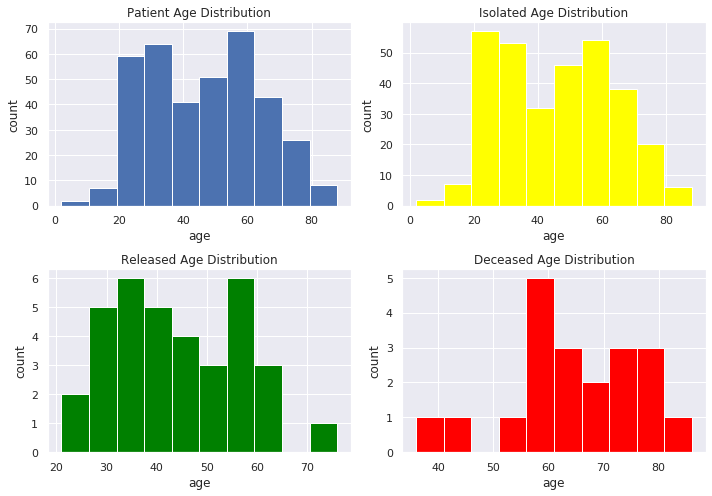

In [52]:
plt.figure(figsize = (10, 7))

plt.subplot(2,2,1)
patient_kcdc['age'].hist()
plt.xlabel('age')
plt.ylabel('count')
plt.title('Patient Age Distribution')

plt.subplot(2,2,2)
patient_kcdc.loc[patient_kcdc['state'] == 'isolated', 'age'].hist(color = 'yellow')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Isolated Age Distribution')

plt.subplot(2,2,3)
patient_kcdc.loc[patient_kcdc['state'] == 'released', 'age'].hist(color = 'green')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Released Age Distribution')

plt.subplot(2,2,4)
patient_kcdc.loc[patient_kcdc['state'] == 'deceased', 'age'].hist(color = 'red')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Deceased Age Distribution')

plt.tight_layout()
plt.show()

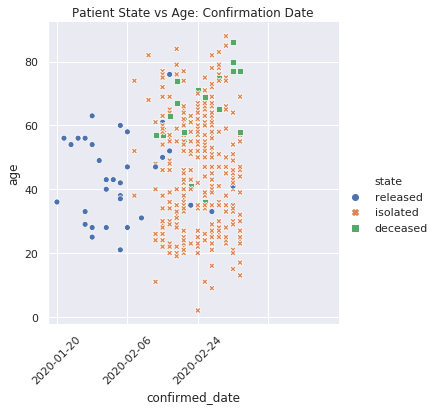

In [64]:
sns.relplot(x = 'confirmed_date', y = 'age', style = 'state', hue = 'state', data = patient_kcdc)
plt.title('Patient State vs Age: Confirmation Date')
plt.xticks(np.arange(0, len(time_kcdc['date']), step = int(len(time_kcdc) / 4)), rotation = 45)
plt.show()